In [ ]:
import os
import glob
import numpy as np
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
original_cat_dataset_path="/content/drive/MyDrive/Colab Notebooks/CS512_AS3/kagglecatsanddogs_5340/PetImages/Cat"
cat_files = glob.glob(os.path.join(original_cat_dataset_path,'*.jpg'))
print("{} images found:".format(len(cat_files)),'Cat')


original_dog_dataset_path="/content/drive/MyDrive/Colab Notebooks/CS512_AS3/kagglecatsanddogs_5340/PetImages/Dog"
dog_files = glob.glob(os.path.join(original_dog_dataset_path,'*.jpg'))
print("{} images found:".format(len(dog_files)),'Dog')


12510 images found: Cat
12500 images found: Dog


In [ ]:
base_dir="/content/drive/MyDrive/Colab Notebooks/CS512_AS3/kagglecatsanddogs_5340/cats_and_dogs_small"
os.mkdir(base_dir)

train_dir=os.path.join(base_dir,'train')
os.mkdir(train_dir)
train_cats_dir=os.path.join(base_dir,'train','cats')
os.mkdir(train_cats_dir)
train_dogs_dir=os.path.join(base_dir,'train','dogs')
os.mkdir(train_dogs_dir)

validation_dir=os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
validation_cats_dir=os.path.join(base_dir,'validation','cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir=os.path.join(base_dir,'validation','dogs')
os.mkdir(validation_dogs_dir)

test_dir=os.path.join(base_dir,'test')
os.mkdir(test_dir)
test_cats_dir=os.path.join(base_dir,'test','cats')
os.mkdir(test_cats_dir)
test_dogs_dir=os.path.join(base_dir,'test','dogs')
os.mkdir(test_dogs_dir)


In [ ]:
#Problem 3(a)

# original_cat_dataset_path
# original_dog_dataset_path
# train_cats_dir
# train_dogs_dir
# validation_cats_dir
# validation_dogs_dir
# test_cats_dir
# test_dogs_dir
import shutil
fnames = ['{}.jpg'.format(i) for i in range(1000, 2000)]
for fname in fnames:
  src = os.path.join(original_cat_dataset_path, fname)
  dst = os.path.join(train_cats_dir, fname)
  #print (src,dst)
  shutil.copyfile (src, dst)

fnames = ['{}.jpg'.format(i) for i in range(1000, 2000)]
for fname in fnames:
  src = os.path.join(original_dog_dataset_path, fname)
  dst = os.path.join(train_dogs_dir, fname)
  #print (src,dst)
  shutil.copyfile (src, dst)

fnames = ['{}.jpg'.format(i) for i in range(2000,2500)]
for fname in fnames:
  src = os.path.join(original_cat_dataset_path, fname)
  dst = os.path.join(validation_cats_dir, fname)
  #print (src,dst)
  shutil.copyfile (src, dst)

fnames = ['{}.jpg'.format(i) for i in range(2000,2500)]
for fname in fnames:
  src = os.path.join(original_dog_dataset_path, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  #print (src,dst)
  shutil.copyfile (src, dst)

fnames = ['{}.jpg'.format(i) for i in range(2500,3000)]
for fname in fnames:
  src = os.path.join(original_cat_dataset_path, fname)
  dst = os.path.join(test_cats_dir, fname)
  #print (src,dst)
  shutil.copyfile (src, dst)

fnames = ['{}.jpg'.format(i) for i in range(2500,3000)]
for fname in fnames:
  src = os.path.join(original_dog_dataset_path, fname)
  dst = os.path.join(test_dogs_dir, fname)
  #print (src,dst)
  shutil.copyfile (src, dst)





In [ ]:
print ('total training cat images:', len(os.listdir(train_cats_dir))) 
print ('total training dog images:', len(os.listdir(train_dogs_dir))) 
print ('total validation cat images:', len(os.listdir(validation_cats_dir)))
print ('total validation dog images:', len(os.listdir(validation_dogs_dir))) 
print ('total test cat images:', len(os.listdir(test_cats_dir))) 
print ('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [ ]:
#Problem 3(b)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
# model.add(BatchNormalization(momentum=momentum)) #Don't know if this is the right spot 
model.add(layers.MaxPooling2D( (2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D( (2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D ( (2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D ( (2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers. Dense(512, activation='relu')) 
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [ ]:

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=1) #steps_per_epoch=100, epochs=30
model.save('/content/drive/MyDrive/Colab Notebooks/CS512_AS3/kagglecatsanddogs_5340/cats_and_dogs_small/model_1.h5')

<ipython-input-28-fe166095b81d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=1) #steps_per_epoch=100, epochs=30


Epoch 1/30
100/100 [==============================] - 131s 1s/step - loss: 0.6930 - acc: 0.5055 - val_loss: 0.5969 - val_acc: 0.6500
Epoch 2/30
100/100 [==============================] - 123s 1s/step - loss: 0.6713 - acc: 0.5805 - val_loss: 0.6045 - val_acc: 0.6500
Epoch 3/30
100/100 [==============================] - 123s 1s/step - loss: 0.6446 - acc: 0.6150 - val_loss: 0.6182 - val_acc: 0.6500
Epoch 4/30
100/100 [==============================] - 124s 1s/step - loss: 0.6286 - acc: 0.6445 - val_loss: 0.5504 - val_acc: 0.8500
Epoch 5/30
100/100 [==============================] - 128s 1s/step - loss: 0.5869 - acc: 0.6990 - val_loss: 0.4935 - val_acc: 0.7500
Epoch 6/30
100/100 [==============================] - 123s 1s/step - loss: 0.5663 - acc: 0.7020 - val_loss: 0.5334 - val_acc: 0.7000
Epoch 7/30
100/100 [==============================] - 122s 1s/step - loss: 0.5459 - acc: 0.7270 - val_loss: 0.5158 - val_acc: 0.7500
Epoch 8/30
100/100 [==============================] - 120s 1s/step - 

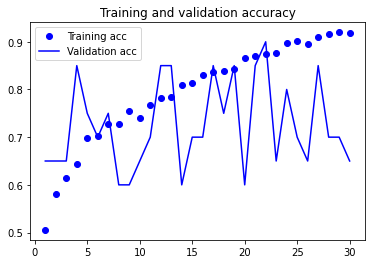

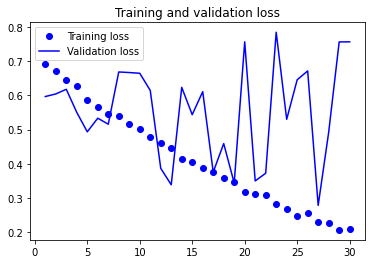

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc'] 
val_acc = history. history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label= 'Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot (epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [ ]:
#Problem 3(c)
#Data Augmentation

train_datagen = ImageDataGenerator(rescale= 1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True,)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=32, class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# steps_per_epoch = len(X_train)//batch_size
# validation_steps = len(X_test)//batch_size
batch_size=20
history = model.fit_generator(train_generator, steps_per_epoch=len(train_generator)//batch_size, epochs=30, validation_data=validation_generator, validation_steps=len(validation_generator)//batch_size) #steps_per_epoch=100, epochs=30


<ipython-input-41-7b02ebc17a5e>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, steps_per_epoch=len(train_generator)//batch_size, epochs=30, validation_data=validation_generator, validation_steps=len(validation_generator)//batch_size) #steps_per_epoch=100, epochs=30


Epoch 1/30
3/3 [==============================] - 36s 14s/step - loss: 0.4022 - accuracy: 0.8021 - val_loss: 0.2967 - val_accuracy: 0.8750
Epoch 2/30
3/3 [==============================] - 39s 14s/step - loss: 0.4547 - accuracy: 0.7812 - val_loss: 0.1087 - val_accuracy: 1.0000
Epoch 3/30
3/3 [==============================] - 39s 15s/step - loss: 0.3659 - accuracy: 0.8750 - val_loss: 0.4318 - val_accuracy: 0.7812
Epoch 4/30
3/3 [==============================] - 36s 14s/step - loss: 0.4063 - accuracy: 0.7812 - val_loss: 0.2147 - val_accuracy: 0.9062
Epoch 5/30
3/3 [==============================] - 37s 14s/step - loss: 0.4493 - accuracy: 0.7812 - val_loss: 0.4286 - val_accuracy: 0.7812
Epoch 6/30
3/3 [==============================] - 38s 15s/step - loss: 0.4761 - accuracy: 0.7708 - val_loss: 0.2659 - val_accuracy: 0.8750
Epoch 7/30
3/3 [==============================] - 37s 14s/step - loss: 0.2992 - accuracy: 0.8750 - val_loss: 0.2085 - val_accuracy: 0.9375
Epoch 8/30
3/3 [===========

<Figure size 432x288 with 0 Axes>

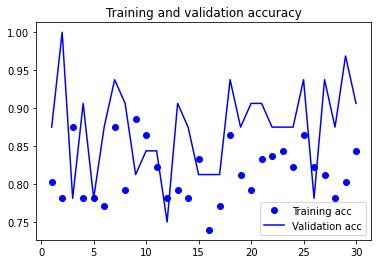

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy'] 
val_acc = history. history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label= 'Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

In [ ]:
#Problem 3(d)
#Replace your colvolution layers with a pre-trained convolution base of VGG16 and evaluate performance on the validation set.

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers

# Load the pre-trained VGG16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the pre-trained convolution base
vgg16.trainable = False

# Define the model architecture
model = tf.keras.Sequential([
    vgg16,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model on the subset of cats and dogs dataset
history = model.fit(train_generator,
                    epochs=20,
                    validation_data=validation_generator)
#epochs=20 original


Epoch 1/20
63/63 [==============================] - 906s 14s/step - loss: 0.6697 - accuracy: 0.7025 - val_loss: 0.3339 - val_accuracy: 0.8440
Epoch 2/20
63/63 [==============================] - 893s 14s/step - loss: 0.4439 - accuracy: 0.7970 - val_loss: 0.2929 - val_accuracy: 0.8720
Epoch 3/20
63/63 [==============================] - 894s 14s/step - loss: 0.3877 - accuracy: 0.8320 - val_loss: 0.2907 - val_accuracy: 0.8720
Epoch 4/20
63/63 [==============================] - 919s 15s/step - loss: 0.3820 - accuracy: 0.8230 - val_loss: 0.2665 - val_accuracy: 0.8830
Epoch 5/20
63/63 [==============================] - 893s 14s/step - loss: 0.3769 - accuracy: 0.8250 - val_loss: 0.2581 - val_accuracy: 0.8840
Epoch 6/20
63/63 [==============================] - 894s 14s/step - loss: 0.3749 - accuracy: 0.8235 - val_loss: 0.2502 - val_accuracy: 0.8900
Epoch 7/20
63/63 [==============================] - 894s 14s/step - loss: 0.3563 - accuracy: 0.8370 - val_loss: 0.2423 - val_accuracy: 0.9030
Epoch 

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy'] 
val_acc = history. history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label= 'Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()